In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22513


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22508,2021-05-04,47,沖縄県,33,12715,0,137
22509,2021-05-05,47,沖縄県,63,12778,0,137
22510,2021-05-06,47,沖縄県,39,12817,0,137
22511,2021-05-07,47,沖縄県,82,12899,1,138
22512,2021-05-08,47,沖縄県,93,12992,0,138


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10538,6782,124
43,香川県,17723,1510,23
44,高知県,18681,1117,20
45,鳥取県,14849,394,2
46,鹿児島県,22034,2512,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口
0,三重県,11496,4091,89,1813859
1,京都府,12454,13558,193,2545899
2,佐賀県,19639,1911,14,823810
3,兵庫県,13412,34920,770,5549568
4,北海道,479,26175,890,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp["10万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 100000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数,10万人当たりの感染者数
4,北海道,479,26175,890,5267762,49.689033,496.890330
41,青森県,958,1768,26,1275783,13.858156,138.581561
19,岩手県,1437,1076,34,1235517,8.708905,87.089049
11,宮城県,1916,8307,72,2292385,36.237369,362.373685
36,秋田県,2395,581,9,985416,5.895987,58.959871
15,山形県,2874,1591,35,1082296,14.700230,147.002299
35,福島県,3353,3788,127,1881981,20.127727,201.277271
38,茨城県,3832,8526,135,2921436,29.184278,291.842779
27,栃木県,4311,5571,72,1965516,28.343702,283.437021
37,群馬県,4790,6616,106,1969439,33.593323,335.933228


## 感染者数

### 平均値、中央値

In [7]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      13453.085106
std       26041.866581
min         378.000000
25%        1839.500000
50%        4077.000000
75%        8416.500000
max      145562.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [8]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数,10万人当たりの感染者数
0,東京都,6227,145562,1915,13834925,105.213436,1052.134363
1,大阪府,12933,88671,1696,8849635,100.197353,1001.973528
2,神奈川県,6706,55400,833,9209442,60.155653,601.556533
3,埼玉県,5269,39574,749,7390054,53.550353,535.503529
4,愛知県,11017,36279,648,7575530,47.889719,478.897186
5,兵庫県,13412,34920,770,5549568,62.923817,629.238168
6,千葉県,5748,34235,640,6319772,54.171258,541.712581
7,福岡県,19160,26304,369,5129841,51.276443,512.764431
8,北海道,479,26175,890,5267762,49.689033,496.890330
9,京都府,12454,13558,193,2545899,53.254273,532.542729


## １万人あたりの感染者数

### 平均値、中央値

In [9]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      31.069282
std       23.276264
min        5.564355
25%       15.562519
50%       23.197096
75%       42.063544
max      105.213436
Name: １万人当たりの感染者数, dtype: float64

## グラフ化

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [11]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)
all_jp_desc_100k = all_jp.sort_values(["10万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


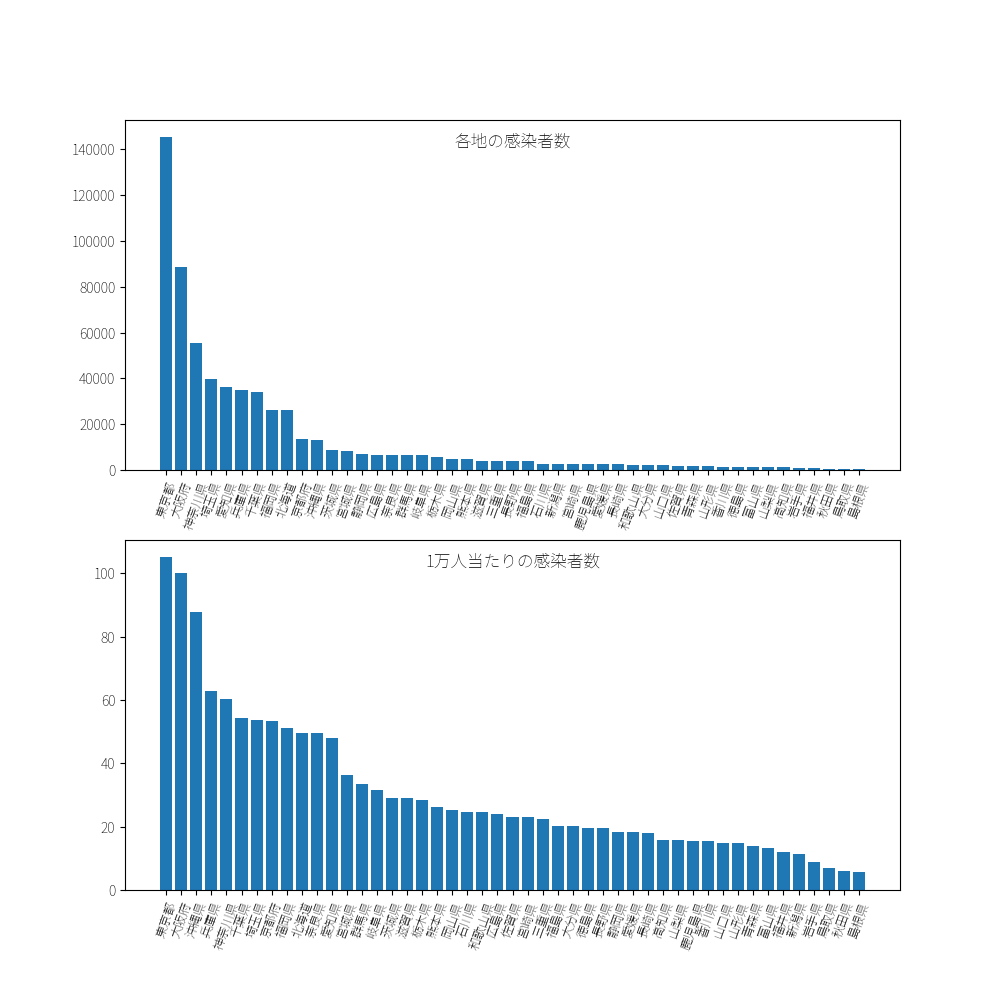

Text(0.5, 0.9, '1万人当たりの感染者数')

In [16]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


## 度数分布表

In [13]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=8)

print(hist)
print(bin_edges)

[38  5  1  1  1  0  0  1]
[   378.  18526.  36674.  54822.  72970.  91118. 109266. 127414. 145562.]


## ヒストグラム

<IPython.core.display.Javascript object>


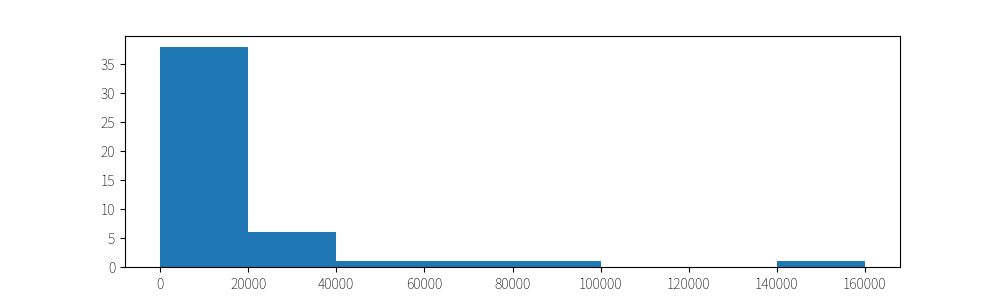

(array([38.,  6.,  1.,  1.,  0.,  0.,  1.]),
 array([     0,  20000,  40000,  80000, 100000, 120000, 140000, 160000]),
 <a list of 7 Patch objects>)

In [14]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=[0,20000,40000,80000,100000,120000,140000,160000])

<IPython.core.display.Javascript object>


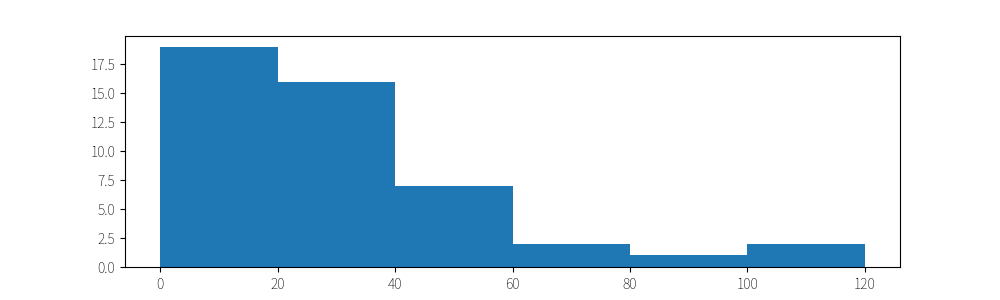

(array([19., 16.,  7.,  2.,  1.,  2.]),
 array([  0,  20,  40,  60,  80, 100, 120]),
 <a list of 6 Patch objects>)

In [15]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["１万人当たりの感染者数"],bins=[0,20,40,60,80,100,120])